<a href="https://colab.research.google.com/github/brunamulinari/TechLabsProject_PsiData/blob/main/suicidios_saudemental_OMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados da OMS sobre suicídio por países da América Latina, para comparação com amostra de países ricos - de 2017 a 2019


## Seleção e tratamento de dados

A base original tem dados desde os anos 2000 até 2019, no entanto a intenção é utilizar apenas dos anos 2017 até 2019.

A base também possui dados sobre todos os países, porém a intenção é capturar dados apenas dos países da América Latina e comparar com os dados de alguns outros países com alta renda per capita.


In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np

In [ ]:
#Importando 1ª base de dados alocada em repositório do Github na pasta principal do projeto
#Base de dados .csv da OMS sobre a taxa de suicídios dos países do ano 2000 até 2020

#O link url deve ser puxado através de um link raw novo toda vez através do repositório do 
# Github, há um erro que não permite um link permanente 
url = 'https://raw.githubusercontent.com/brunamulinari/TechLabsProject_PsiData/main/OMS-taxas-suicidio-paises-2000_2020.csv?token=ATZB42WGOFNSLUWY7SEPAUDAZJWPW'
dfsuic00_20 = pd.read_csv(url, delimiter=',', header=1)

In [ ]:
#Exibindo as 5 primeiras linhas

dfsuic00_20.head()

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,4.1 [2.3-7.0],4.1 [2.3-6.8],4.1 [2.3-6.8],4.0 [2.3-6.7],4.0 [2.3-6.6],3.9 [2.3-6.6],4.0 [2.3-6.7],4.0 [2.3-6.6],4.1 [2.4-6.8],4.3 [2.5-7.0],4.4 [2.6-7.2],4.6 [2.7-7.6],4.8 [2.8-7.9],4.9 [2.8-8.0],5.0 [2.9-8.1],5.0 [2.9-8.2],5.0 [2.8-8.1],5.0 [2.9-8.2],5.0 [2.9-8.2],4.9 [2.8-8.0]
1,Afghanistan,Male,4.6 [2.6-7.9],4.6 [2.6-7.8],4.6 [2.7-7.9],4.4 [2.6-7.4],4.3 [2.5-7.3],4.2 [2.5-7.2],4.3 [2.5-7.4],4.3 [2.5-7.3],4.5 [2.6-7.5],4.6 [2.7-7.7],4.8 [2.8-8.0],5.1 [2.9-8.4],5.3 [3.0-8.8],5.4 [3.1-8.8],5.4 [3.1-8.9],5.4 [3.1-8.9],5.3 [3.0-8.7],5.4 [3.0-8.9],5.2 [2.9-8.7],5.0 [2.8-8.3]
2,Afghanistan,Female,3.6 [2.0-5.9],3.5 [2.0-5.8],3.4 [2.0-5.7],3.6 [2.1-5.9],3.6 [2.0-5.9],3.6 [2.1-5.9],3.7 [2.1-6.0],3.7 [2.2-6.0],3.8 [2.2-6.1],3.9 [2.3-6.2],4.0 [2.3-6.4],4.2 [2.4-6.7],4.3 [2.5-6.9],4.4 [2.6-7.1],4.5 [2.6-7.3],4.6 [2.7-7.5],4.6 [2.7-7.4],4.6 [2.7-7.5],4.8 [2.8-7.8],4.8 [2.8-7.7]
3,Albania,Both sexes,4.3 [2.4-6.7],4.5 [2.5-6.9],4.7 [2.6-7.1],4.7 [2.6-7.1],4.8 [2.6-7.2],5.0 [2.7-7.4],5.3 [3.0-7.7],5.2 [2.9-7.5],7.9 [4.8-11.1],7.8 [4.7-10.8],8.1 [4.9-11.0],8.2 [5.0-10.9],8.1 [5.0-10.7],7.8 [4.9-10.2],7.5 [4.8-9.7],4.8 [3.1-6.3],4.8 [3.2-6.3],4.6 [3.1-6.0],4.5 [3.1-5.9],4.9 [3.4-6.4]
4,Albania,Male,5.9 [3.1-9.3],6.2 [3.2-9.6],6.3 [3.3-9.9],6.3 [3.2-9.7],6.3 [3.2-9.6],6.6 [3.4-10.0],6.9 [3.5-10.3],6.9 [3.5-10.1],7.5 [3.9-10.7],9.5 [5.0-13.4],10.2 [5.3-14.0],10.3 [5.5-14.0],10.3 [5.6-13.9],9.8 [5.4-13.0],9.7 [5.5-12.8],6.5 [3.8-8.5],6.4 [3.8-8.3],6.2 [3.9-8.1],6.1 [3.9-8.0],7.0 [4.6-9.2]


**As taxas de sucídio são relativas a quantidade suicídios por 100 mil habitantes, por país, para cada ano, para ambos os sexos e para homens e mulheres.*

In [ ]:
#excluir as colunas dos anos menores que 2017

dfsuic00_20 = dfsuic00_20.drop(columns=['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', 
                                        '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000'])
dfsuic00_20.head()

,Country,Sex,2019,2018,2017
0,Afghanistan,Both sexes,4.1 [2.3-7.0],4.1 [2.3-6.8],4.1 [2.3-6.8]
1,Afghanistan,Male,4.6 [2.6-7.9],4.6 [2.6-7.8],4.6 [2.7-7.9]
2,Afghanistan,Female,3.6 [2.0-5.9],3.5 [2.0-5.8],3.4 [2.0-5.7]
3,Albania,Both sexes,4.3 [2.4-6.7],4.5 [2.5-6.9],4.7 [2.6-7.1]
4,Albania,Male,5.9 [3.1-9.3],6.2 [3.2-9.6],6.3 [3.3-9.9]


In [ ]:
#seleção dos países da América Latina + países ricos selecionados

lista = list(['Brazil', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
              'Bolivia (Plurinational State of)', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador',
              'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Jamaica', 'Mexico', 'Nicaragua', 
              'Panama', 'Paraguay', 'Peru', 'Saint Vincent and the Grenadines', 'Saint Lucia',
              'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'Switzerland', 
              'Norway', 'United States of America', 'Singapore', 'Germany', 'Japan', 'United Arab Emirates'])



dfsuic00_20 = dfsuic00_20.loc[dfsuic00_20['Country'].isin(lista)]

#sobre os países ricos, eles foram selecionados pelo alto PIB per 
#capita (de acordo com estimativas do FMI para 2021) link:
#https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita
#
#A partir disto, buscou-se priorizar a diversidade da amostra:
#País       Ranking PPC 2021*       Característica diversa             Continente/região
#Suíça            2°                                                        Europa
#Noruega          3°                      país nórdico              Europa/países nórdicos
#EUA              7°                país mais rico do mundo            América do norte
#Cingapura        8°             cidade-Estado e tigre asiático           Ásia/oriente
#Alemanha        16°                                                         Europa
#Japão           25°                                                      Ásia/oriente
#Emirados Árabes 26°                      país árabe                   Ásia/Oriente Médio
#
# *estimativas


In [ ]:
## Visualizando novo tamanho total do banco de dados

dfsuic00_20.shape

(105, 5)

Como mostra o resultado, agora a base de dados tem 105 linhas e 5 colunas

In [ ]:
#renomear os nomes das colunas 'Country' e 'Sex'
#após erro em chamar as colunas em anos numerais para os gráficos, os nomes dessas 
# colunas foram iniciados com uma letra 'y' o que resolveu o problema

dfsuic00_20.rename(columns={'Country': 'País'}, inplace = True)
dfsuic00_20.rename(columns={'Sex': 'Sexo'}, inplace = True)
dfsuic00_20.rename(columns={'2017': 'y2017'}, inplace = True)
dfsuic00_20.rename(columns={'2018': 'y2018'}, inplace = True)
dfsuic00_20.rename(columns={'2019': 'y2019'}, inplace = True)

In [ ]:
#exibir as mudanças com a seleção específica de dados

dfsuic00_20.head(6)

,País,Sexo,y2019,y2018,y2017
12,Antigua and Barbuda,Both sexes,0.4 [0.3-0.6],0.4 [0.3-0.5],0.0 [0.0-0.0]
13,Antigua and Barbuda,Male,0.0 [0.0-0.0],0.0 [0.0-0.0],0.0 [0.0-0.0]
14,Antigua and Barbuda,Female,0.8 [0.5-1.1],0.7 [0.5-1.0],0.0 [0.0-0.0]
15,Argentina,Both sexes,8.4 [6.7-10.3],9.2 [7.4-11.2],8.9 [7.3-10.7]
16,Argentina,Male,13.7 [10.9-16.8],15.1 [12.2-18.3],14.5 [11.9-17.3]
17,Argentina,Female,3.3 [2.6-4.2],3.6 [2.8-4.4],3.5 [2.8-4.3]


In [ ]:
#Quantidade de dados em cada coluna, tipo de variável

dfsuic00_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 12 to 536
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    105 non-null    object
 1   Sexo    105 non-null    object
 2   y2019   105 non-null    object
 3   y2018   105 non-null    object
 4   y2017   105 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


Conforme observado, todas as variáveis são do tipo 'string' (object), no entanto, apenas as variáveis da coluna 'País' precisam ser strings, pois são nomes de países. As variáveis das colunas 'Sexo' podem ser alteradas para outro formato, uma vez que são categóricas. Nas colunas de anos podem ainda ter outro formato, de preferência numérico, e o melhor nesse caso seria para variáveis do tipo 'float' que comportam números decimais, uma vez que a taxa de homicídios por ano, é um número decimal.

In [ ]:
#Exclusão dos dados entre colchetes '[]' das taxas de suicídio e transformação 
#das variáveis string em variáveis float

Anos = ['y2019', 'y2018', 'y2017']
for col in Anos:
  dfsuic00_20[col] = [i[:4] for i in dfsuic00_20[col]]
  dfsuic00_20[col] = dfsuic00_20[col].astype(float)

In [ ]:
#exibição das variáveis após adequadação dos dados das taxas de suicídio
print(dfsuic00_20)


                                   País        Sexo  y2019  y2018  y2017
12                  Antigua and Barbuda  Both sexes    0.4    0.4    0.0
13                  Antigua and Barbuda        Male    0.0    0.0    0.0
14                  Antigua and Barbuda      Female    0.8    0.7    0.0
15                            Argentina  Both sexes    8.4    9.2    8.9
16                            Argentina        Male   13.7   15.1   14.5
..                                  ...         ...    ...    ...    ...
526                             Uruguay        Male   34.5   34.7   33.8
527                             Uruguay      Female    8.9    8.6    8.6
534  Venezuela (Bolivarian Republic of)  Both sexes    2.1    2.2    2.2
535  Venezuela (Bolivarian Republic of)        Male    3.5    3.6    3.6
536  Venezuela (Bolivarian Republic of)      Female    0.7    0.7    0.7

[105 rows x 5 columns]


Após a adequação das variáveis, é possível separar alguns grupos para melhor visualização de seus dados. A princípio, podemos criar 3 novos data frames, que farão o papel de grupo e podem permitir uma comparação entre: 1) os países da América Latina; 2) os países ricos selecionados; e 3) o próprio Brasil

In [ ]:
#lista_AL se refere a lista de países da América Latina
lista_AL = list(['Brazil', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
              'Bolivia (Plurinational State of)', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador',
              'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Jamaica', 'Mexico', 'Nicaragua', 
              'Panama', 'Paraguay', 'Peru', 'Saint Vincent and the Grenadines', 'Saint Lucia',
              'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)'])

#lista_PPC se refere a lista de países ricos selecionados
lista_PR = list(['Switzerland','Norway', 'United States of America', 'Singapore',
                 'Germany','Japan', 'United Arab Emirates'])

#lista_BR se refere apenas ao Brasil
lista_BR = list(['Brazil'])

#criação de um dataframe para cada grupo
dfsuic_AL = dfsuic00_20.loc[dfsuic00_20['País'].isin(lista_AL)]
dfsuic_PPC = dfsuic00_20.loc[dfsuic00_20['País'].isin(lista_PR)]
dfsuic_BR = dfsuic00_20.loc[dfsuic00_20['País'].isin(lista_BR)]

Separação das taxas de suicídio para os grupos, por sexo

In [ ]:
#separando por sexo para os países da América Latina

female_dfAL = dfsuic_AL[dfsuic_AL['Sexo'] == 'Female']
male_dfAL = dfsuic_AL[dfsuic_AL['Sexo'] == 'Male']
both_dfAL = dfsuic_AL[dfsuic_AL['Sexo'] == 'Both sexes']

#separando por sexo para os países ricos selecionados

female_dfPPC = dfsuic_PPC[dfsuic_PPC['Sexo'] == 'Female']
male_dfPPC = dfsuic_PPC[dfsuic_PPC['Sexo'] == 'Male']
both_dfPPC = dfsuic_PPC[dfsuic_PPC['Sexo'] == 'Both sexes']

#separando por sexo para executar os gráficos de coluna e pizza
#América Latina, países ricos e Brasil

df_sexAL = dfsuic_AL.loc[(dfsuic_AL['Sexo'].isin(['Female','Male']))]
df_sexPPC = dfsuic_PPC.loc[dfsuic_PPC['Sexo'].isin(['Female','Male'])]
df_sexBR = dfsuic_BR.loc[dfsuic_BR['Sexo'].isin(['Female','Male'])]

In [ ]:
#retirando o sexo para manter apenas a taxa de suicídios média para toda a população
df_nosexAL = dfsuic_AL.loc[(dfsuic_AL['Sexo'].isin(['Both sexes']))] 
df_nosexPPC = dfsuic_PPC.loc[(dfsuic_PPC['Sexo'].isin(['Both sexes']))]

In [ ]:
#exclusão da coluna 'Sexo' nestes dataframes, para utilizar somente a taxa de suicídios por país

df_nosexAL = df_nosexAL.drop(columns=['Sexo'])
df_nosexPPC = df_nosexPPC.drop(columns=['Sexo'])
df_nosexBR = dfsuic_BR.loc[(dfsuic_BR['Sexo'].isin(['Both sexes']))]
df_nosexBR = df_nosexBR.drop(columns=['Sexo'])

Elaboração de médias de taxa de suicídio por sexo para cada grupo e ano, afim de disponibilizar elementos para criação de gráficos.

In [ ]:
#médias de suicídio por sexo para cada ano nos países da América Latina
fm17AL = female_dfAL['y2017'].mean()
fm18AL = female_dfAL['y2018'].mean()
fm19AL = female_dfAL['y2019'].mean()

ml17AL = male_dfAL['y2017'].mean()
ml18AL = male_dfAL['y2018'].mean()
ml19AL = male_dfAL['y2019'].mean()

#médias de suicídio por sexo para cada ano nos países ricos selecionados
fm17PPC = female_dfPPC['y2017'].mean()
fm18PPC = female_dfPPC['y2018'].mean()
fm19PPC = female_dfPPC['y2019'].mean()

ml17PPC = male_dfPPC['y2017'].mean()
ml18PPC = male_dfPPC['y2018'].mean()
ml19PPC = male_dfPPC['y2019'].mean()

## Visualização estatística, gráfica e breves análises a partir dos dados


###Estatísticas

In [ ]:
#estatísticas básicas sobre a taxa de suicídios dos países da América Latina
dfsuic_AL.describe()

,y2019,y2018,y2017
count,84.000000,84.000000,84.000000
mean,7.294048,7.264286,7.254762
std,9.257916,9.123050,8.974172
min,0.000000,0.000000,0.000000
25%,1.975000,2.200000,2.175000
50%,4.550000,4.650000,5.050000
75%,8.750000,8.850000,9.225000
max,63.000000,61.600000,60.100000


In [ ]:
#estatísticas básicas sobre a taxa de suicídios dos países ricos selecionados
dfsuic_PPC.describe()

,y2019,y2018,y2017
count,21.000000,21.000000,21.000000
mean,12.461905,12.390476,12.357143
std,5.792709,5.998659,6.224192
min,3.000000,2.900000,2.800000
25%,7.700000,7.400000,7.100000
50%,11.800000,12.000000,11.500000
75%,15.800000,16.000000,16.300000
max,25.000000,24.300000,24.900000


Num primeiro momento, nota-se que para todos os anos, a taxa de suicídios média, é menor para a América Latina que para os países ricos, o que primeiramente causa uma surpresa. Afinal, dinheiro (ou riqueza) traz felicidade?
Ou melhor, países com elevado PIB per capita, não deveriam ter uma população com maior satisfação por ter mais recursos, ou ao menos ter estruturas médico-hospitalares capazes de promover tratamentos que proporcionassem uma saúde mental de qualidade a seus habitantes? 

Deste modo, mesmo a América Latina (AL) sendo mais pobre, possui menores registros de suicídio. Há países na AL inclusive com nenhum suicídio nos últimos três anos (2017 a 2019), enquanto que nos países ricos, o valor mínimo verificado foi de 2,8 (2017) e no 1º quartil (25% da amostra), o valor máximo encontrado já era de 7,1 nos países ricos.

Um ponto de destaque é que um país da América Latina (AL), a Guiana, detém uma taxa de suicídios altíssima, (63,0 para homens para 2019) que destoa bastante do grupo, até porque até o quartil 3, (75% da amostra), o valor mais alto é de 8,75. Pode-se afirmar que a Guiana, é um ponto fora da curva, e cabe questionar que peculiaridade faz o índice de suicídios ser tão elevado neste país.



In [ ]:
#dados sobre a taxa de suicídios do Brasil
dfsuic_BR

,País,Sexo,y2019,y2018,y2017
66,Brazil,Both sexes,6.9,7.0,6.6
67,Brazil,Male,10.9,10.9,10.3
68,Brazil,Female,3.0,3.1,3.0


A taxa de suicídios média entre os brasileiros (ambos os sexos), está próxima de 7,0. De 2017 a 2018 houve um aumento de 0,4 e de 2018 a 2019, houve uma pequena queda de 0,1 pontos. O ponto positivo é que a taxa para o Brasil se manteve abaixo da taxa da América Latina.

Nota-se que para todo o período, a taxa de suicídios de homens é mais que o triplo da taxa de suicídios das mulheres. Deste modo, nota-se que em 2019, os homens brasileiros, são vitimados, na média, mais que os latino-americanos no geral (7,29), porém, menos que os habitantes dos países ricos (12,46).

###Utilização das bibliotecas Matplotlib e Seaborn para visualização de dados

In [ ]:
#chamada de bibliotecas adicionais que permitem a visualização de dados
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


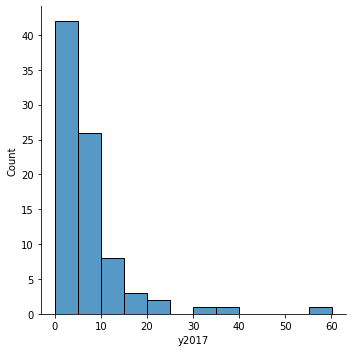

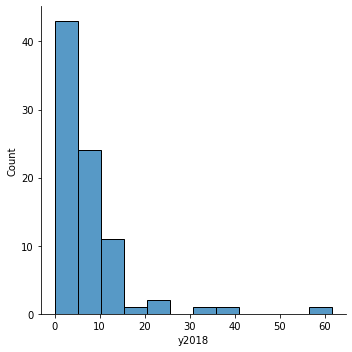

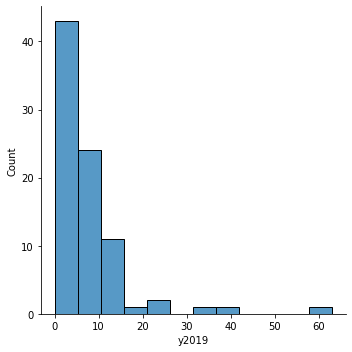

In [ ]:
#Gráfico de colunas relativas a quantidade encontrada das taxas de suicídio para
# os anos de 2017, 2018 e 2019 dos países da América Latina
sns.displot(dfsuic_AL.y2017, bins=12)
sns.displot(dfsuic_AL.y2018, bins=12)
sns.displot(dfsuic_AL.y2019, bins=12)

Se observa que para os três anos selecionados, a concentração da taxa de suicídios para os países da América Latina ficou concetrada em indíces abaixo de 15 suicídios por 100 mil habitantes, sendo que a maior concentração de índices está abaixo de 5, o que reflete o baixo nível de suicídios na maioria dos países latinos. 

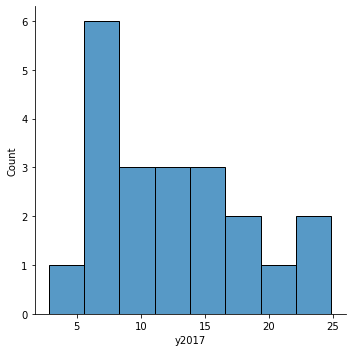

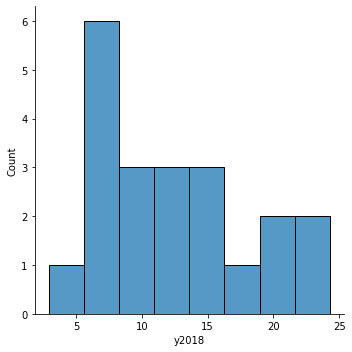

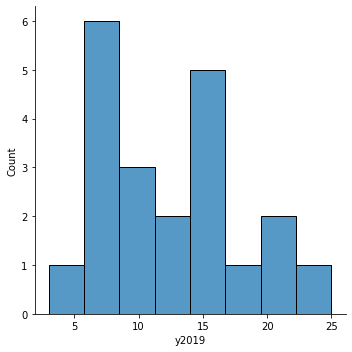

In [ ]:
#Coluna relativa a quantidade encontrada das taxas de suicídio para os anos de 
# 2017, 2018 e 2019 dos países ricos selecionados
sns.displot(dfsuic_PPC.y2017, bins=8)
sns.displot(dfsuic_PPC.y2018, bins=8)
sns.displot(dfsuic_PPC.y2019, bins=8)

Já o que nota-se nos países ricos selecionados é uma taxa de suicídios mais elevada, em grande maioria superior a 5 e com um destaque considerável entre 10 e 20 mortes por 100 mil habitantes, com aparente agravamento do indicador em 2019.

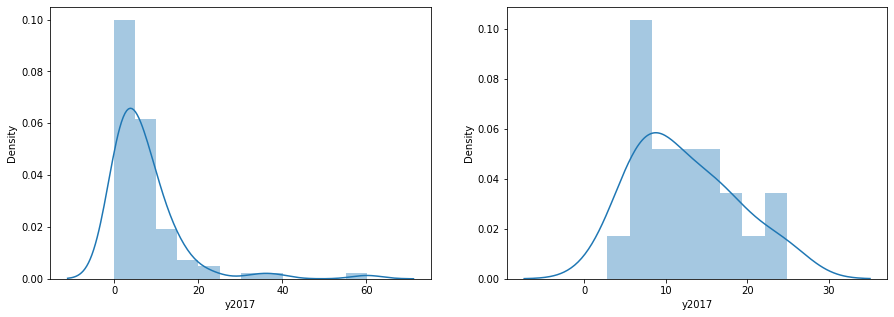

In [ ]:
#histograma comparando a distribuição das taxas de suicídios entre 
# os países da América Latina e os países ricos selecionados no ano de 2017
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(dfsuic_AL.y2017, bins=12, ax=ax[0])
sns.distplot(dfsuic_PPC.y2017, bins=8, ax=ax[1])

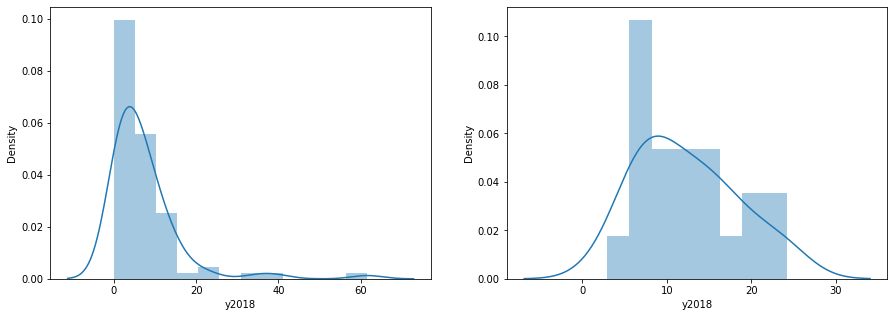

In [ ]:
#histograma comparando a distribuição das taxas de suicídios entre 
# os países da América Latina e os países ricos selecionados no ano de 2018
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(dfsuic_AL.y2018, bins=12, ax=ax[0])
sns.distplot(dfsuic_PPC.y2018, bins=8, ax=ax[1])

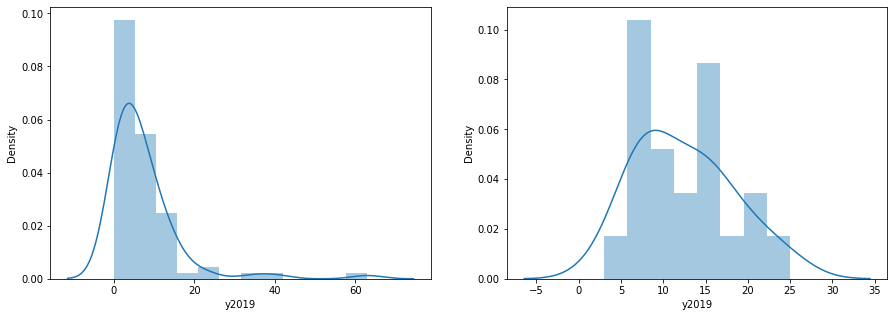

In [ ]:
#histograma comparando a distribuição das taxas de suicídios entre 
# os países da América Latina e os países ricos selecionados no ano de 2019
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(dfsuic_AL.y2019, bins=12, ax=ax[0])
sns.distplot(dfsuic_PPC.y2019, bins=8, ax=ax[1])

Através dos histogramas gerados, observa-se onde está o pico de concentração das taxas de suicídio para cada grupo, sendo que os países ricos tem um achatamento da sua linha, indicando um número mais robusto nos índices mais altos de mortes, enquanto que a América Latina apresenta nos anos selecionados, um pico acentuado em níveis baixos.

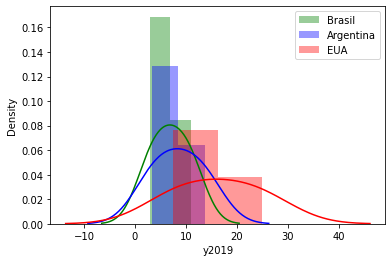

In [ ]:
#Comparando densidades das taxas de suicídio observadas do ano de 2019 para 
# Brasil, Argentina e Estado Unidos
sns.distplot(dfsuic_AL.loc[dfsuic_AL.País == 'Brazil', 'y2019'], color='green', label='Brasil')
sns.distplot(dfsuic_AL.loc[dfsuic_AL.País == 'Argentina', 'y2019'], color='blue', label='Argentina')
sns.distplot(dfsuic_PPC.loc[dfsuic_PPC.País == 'United States of America', 'y2019'], color='red', label='EUA')
plt.legend()

In [ ]:
#preparação para o gráfico de linha

meusDados = {'fmAL': [fm19AL, fm18AL, fm17AL],
             'mlAL': [ml19AL, ml18AL, ml17AL],
             'fmPPC': [fm19PPC, fm18PPC,fm17PPC],
             'mlPPC': [ml19PPC, ml18PPC, ml17PPC],
             'mes_num':[2019,2018,2017],
             'Anos':['2019', '2018', '2017']}

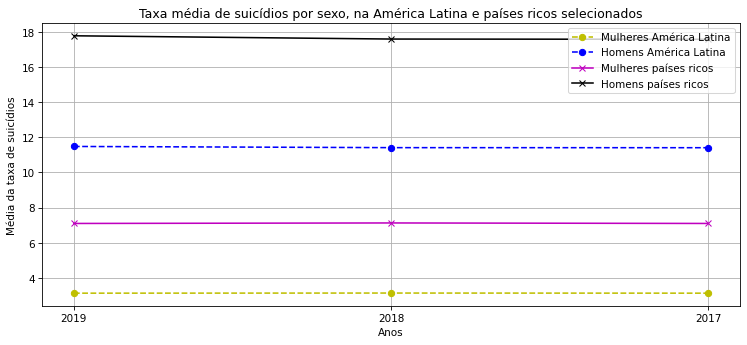

In [ ]:
#execução do gráfico de linha

fig1 = plt.figure(figsize=(12,5), dpi=75)
plt.plot(meusDados['Anos'],meusDados['fmAL'], '--y', marker='o', label='Mulheres América Latina')
plt.plot(meusDados['Anos'],meusDados['mlAL'], '--b', marker='o', label='Homens América Latina')
plt.plot(meusDados['Anos'],meusDados['fmPPC'], color= 'm', marker='x',label='Mulheres países ricos')
plt.plot(meusDados['Anos'],meusDados['mlPPC'], color= 'black', marker='x',label='Homens países ricos')
plt.xlabel('Anos')
plt.ylabel('Média da taxa de suicídios')
plt.title('Taxa média de suicídios por sexo, na América Latina e países ricos selecionados')
plt.legend()
plt.grid(True)
plt.show()

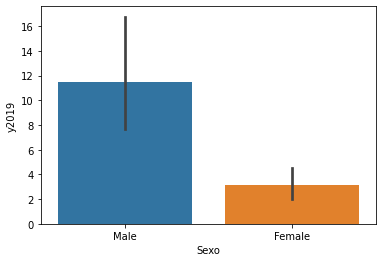

In [ ]:
#barras relativas as taxas de suicídio por sexo, dos países da América Latina, ano 2019
sns.barplot(x='Sexo', y='y2019', data=df_sexAL)

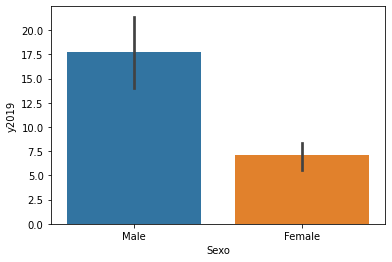

In [ ]:
#barras relativas as taxas de suicídio por sexo, dos países ricos selecionados, ano 2019
sns.barplot(x='Sexo', y='y2019', data=df_sexPPC)

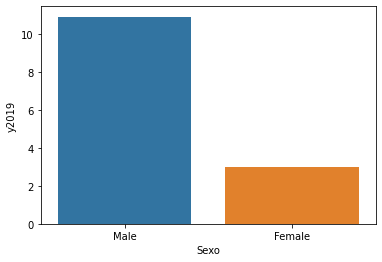

In [ ]:
#barras relativas as taxas de suicídio por sexo, para o Brasil, ano 2019
sns.barplot(x='Sexo', y='y2019', data=df_sexBR)

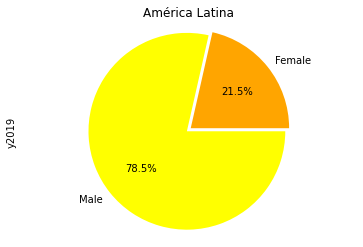

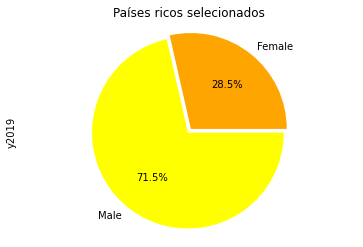

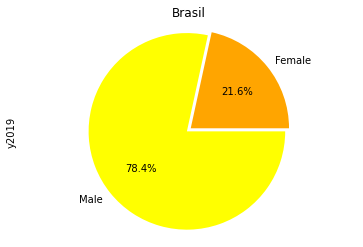

In [ ]:
#Gráficos de pizza com o percentual de taxas de suicídio por sexo no ano de 2019
#Para os países da América Latina
df_sexAL.y2019.groupby(df_sexAL.Sexo).sum().plot(kind='pie', autopct='%1.1f%%', colors=['orange','yellow'], explode=(0.05,0))
plt.axis('equal')
plt.title('América Latina')
plt.show()

#Para os países ricos selecionados
df_sexPPC.y2019.groupby(df_sexPPC.Sexo).sum().plot(kind='pie', autopct='%1.1f%%', colors=['orange','yellow'], explode=(0.05,0))
plt.axis('equal')
plt.title('Países ricos selecionados')
plt.show()

#Para o Brasil
df_sexBR.y2019.groupby(df_sexBR.Sexo).sum().plot(kind='pie', autopct='%1.1f%%', colors=['orange','yellow'], explode=(0.05,0))
plt.axis('equal')
plt.title('Brasil')
plt.show()


Observa-se que homens morrem mais por suicídio tanto nos países pobres como nos países ricos.

Diante deste fato levantam-se várias questões. Porque seriam os homens as maiores vítimas de suicídio? Esta tendência pode ser observada em praticamente todos os países da amostra, deste modo, é uma tendência que ultrapassa fronteiras, está nos países latinos, vai da Europa à Ásia, está tanto nos países mais pobres quanto mais ricos.

Seriam os homens sócio-culturalmente submetidos a situações de pressão insuportáveis em vida que os levam as últimas consequências dando fim a própria vida? Os homens procuram menos tratamento psicológico que as mulheres? O fracasso simbólico ou material para os homens é um fardo impossível de sustentar na atual sociedade? Por vezes, tomadas de decisões mais radicais por parte dos homens em vida podem colocá-los em situações extremamente arriscadas e prejudiciais a sua vida e isso é refletido nas taxas de suicídio elevadas? A sociedade está preparada para atender, aceitar e "ressocializar" homens que desistiram de viver?

Essas questões são levantadas mas não podem aqui ser respondidas devido as limitações da pesquisa que tem ênfase na seleção, tratamento e apresentação dos dados. Cabe agora aos especialistas das ciências humanas e sociais, após a provocação buscar explicar o fenômeno da diferença entre as taxas de suicídio por sexo nos países observados.

###Utilização da biblioteca Plotly para visualização de dados


In [ ]:
#instalando a biblioteca Plotly
!pip install plotly

In [ ]:
#importando o pacote offline da biblioteca
from plotly.offline import iplot
import plotly.graph_objs as go

- Gráfico de barra

In [ ]:
graf4 = go.Bar(x = df_nosexAL['País'],
               y = df_nosexAL['y2019'],
               marker = dict(color= ['#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#ED07CB',
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', 
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', 
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE'
                              ]),
               name='América Latina'
               )
#cadetblue é o nome da melhor cor para os países da América Latina
#green é uma boa cor para o Brasil

layout = go.Layout(title={
                  'text': "Taxas de suicídio para países da América Latina em 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de Suicídios'},
                   xaxis={'titlefont': {'size':12},
                          'tickangle': 35},
                   font={
                  'family':"Arial, monospace",
                  'size': 12,
                  'color':"#525252"}
 )

data = [graf4]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
graf5 = go.Bar(x = df_nosexPPC['País'],
               y = df_nosexPPC['y2019'],
               marker = dict(color= '#6D32EC'),
               name = 'países ricos selecionados'
               )

layout = go.Layout(title={
                  'text': "Taxas de suicídio para os países ricos selecionados em 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de Suicídios'},
                   xaxis={'titlefont': {'size':12},
                          'tickangle': 35},
                   font={
                  'family':"Arial, monospace",
                  'size': 16,
                  'color':"#525252"}
 )

data = [graf5]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
#gráfico 6 unindo gráfico da América Latina e gráfico dos países ricos

graf4 = go.Bar(x = df_nosexAL['País'],
               y = df_nosexAL['y2019'],
               marker = dict(color= ['#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#ED07CB',
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', 
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', 
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE'
                              ]),
               name='América Latina'
               )

graf5 = go.Bar(x = df_nosexPPC['País'],
               y = df_nosexPPC['y2019'],
               marker = dict(color= '#6D32EC'),
               name = 'países ricos selecionados'
               )

layout = go.Layout(title={
                  'text': "Taxas de suicídio por países em 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de Suicídios'},
                   xaxis={'titlefont': {'size':16},
                          'tickangle': 40},
                   font={
                  'family':"Arial, monospace",
                  'size': 12,
                  'color':"#525252"}
 )

data = [graf4, graf5]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

- Gráfico de pizza

In [ ]:
#importando subplots para colocar mais de um gráfico na mesma figura
from plotly.subplots import make_subplots

In [ ]:
#gráfico 7
labels = df_sexAL['Sexo']
colors = ['#6D32EC', '#ED07CB']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= df_sexAL['y2019'], pull=[0.05, 0], name="América Latina"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values= df_sexBR['y2019'], pull=[0.05, 0], name="Brasil"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values= df_sexPPC['y2019'], pull=[0.05, 0], name="Países Ricos"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent+name", marker=dict(colors=colors))

fig.update_layout(
    title_text="Taxa de suicídio por sexo, para a América Latina, Brasil e para os países ricos, em 2019",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='América Latina', x=0.08, y=-0.05, font_size=18, showarrow=False),
                 dict(text='Brasil', x=0.5, y=-0.05, font_size=20, showarrow=False),
                 dict(text='Países Ricos', x=0.92, y=-0.05, font_size=20, showarrow=False)])
fig.show()

###Utilização de gráficos Plotly e envio em nuvem para edição no Chart Studio

In [ ]:
#instalando o chart studio
!pip install chart_studio

     |████████████████████████████████| 71kB 2.5MB/s 


In [ ]:
#importando o módulo do chart studio para exportar gráficos para nuvem
import chart_studio
import chart_studio.plotly as pyo
import plotly.graph_objs as go

In [ ]:
#configurando as credenciais da API
chart_studio.tools.set_credentials_file(username='psidata', api_key='72kkrLMfetmrXIPW6JnI')

In [ ]:
graf4 = go.Bar(x = df_nosexAL['País'],
               y = df_nosexAL['y2019'],
               marker = dict(color= ['#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#ED07CB',
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', 
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', 
                              '#55D6BE', '#55D6BE',  '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE', '#55D6BE'
                              ]),
               name='América Latina'
               )

graf5 = go.Bar(x = df_nosexPPC['País'],
               y = df_nosexPPC['y2019'],
               marker = dict(color= '#6D32EC'),
               name = 'países ricos selecionados'
               )

layout = go.Layout(title={
                  'text': "Taxas de suicídio por países em 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de Suicídios'},
                   xaxis={'titlefont': {'size':16},
                          'tickangle': 40},
                   font={
                  'family':"Arial, monospace",
                  'size': 12,
                  'color':"#525252"}
 )

data = [graf4, graf5]

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig)

'https://plotly.com/~psidata/28/'

In [ ]:
#gráfico 7
labels = df_sexAL['Sexo']
colors = ['#6D32EC', '#ED07CB']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= df_sexAL['y2019'], pull=[0.05, 0], name="América Latina"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values= df_sexBR['y2019'], pull=[0.05, 0], name="Brasil"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values= df_sexPPC['y2019'], pull=[0.05, 0], name="Países Ricos"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent+name", marker=dict(colors=colors))

fig.update_layout(
    title_text="Taxa de suicídio por sexo, para a América Latina, Brasil e para os países ricos, em 2019",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='América Latina', x=0.08, y=-0.05, font_size=18, showarrow=False),
                 dict(text='Brasil', x=0.5, y=-0.05, font_size=20, showarrow=False),
                 dict(text='Países Ricos', x=0.92, y=-0.05, font_size=20, showarrow=False)])

pyo.plot(fig)

'https://plotly.com/~psidata/39/'

# Dados da OMS sobre suicídio por países da América Latina, para comparação com amostra de países ricos - de 2000, 2010 e 2019

## Seleção e tratamento de dados

Novamente abertura da 1ª base de dados, mas agora a partir de um novo período, com invervalo de cerca de 1 década entre os  anos observados.

A base original tem dados desde os anos 2000 até 2019, no entanto a intenção é utilizar apenas dos anos 2000, 2010 e 2019.

In [ ]:
#Importando 1ª base de dados alocada em repositório do Github na pasta principal do projeto
#Base de dados .csv da OMS sobre a taxa de suicídios dos países do ano 2000 até 2019

url = 'https://raw.githubusercontent.com/brunamulinari/TechLabsProject_PsiData/main/OMS-taxas-suicidio-paises-2000_2020.csv?token=ATZB42WGOFNSLUWY7SEPAUDAZJWPW'
dfsuic00_20b = pd.read_csv(url, delimiter=',', header=1)

**As taxas de sucídio são relativas a quantidade suicídios por 100 mil habitantes, por país, para cada ano, para ambos os sexos e para homens e mulheres.*

In [ ]:
#excluir as colunas dos anos que não são 2000, 2010 ou 2019

dfsuic00_20b = dfsuic00_20b.drop(columns=['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009', '2008', 
                                        '2007', '2006', '2005', '2004', '2003', '2002', '2001'])

In [ ]:
#seleção dos países da América Latina + países ricos selecionados

dfsuic00_20b = dfsuic00_20b.loc[dfsuic00_20b['Country'].isin(lista)]

In [ ]:
#renomear os nomes das colunas 'Country' e 'Sex' e dos anos selecionados

dfsuic00_20b.rename(columns={'Country': 'País'}, inplace = True)
dfsuic00_20b.rename(columns={'Sex': 'Sexo'}, inplace = True)
dfsuic00_20b.rename(columns={'2000': 'y2000'}, inplace = True)
dfsuic00_20b.rename(columns={'2010': 'y2010'}, inplace = True)
dfsuic00_20b.rename(columns={'2019': 'y2019'}, inplace = True)

In [ ]:
#exibir as mudanças com a seleção específica de dados

dfsuic00_20b.head(6)

,País,Sexo,y2019,y2010,y2000
12,Antigua and Barbuda,Both sexes,0.4 [0.3-0.6],0.2 [0.1-0.2],1.9 [1.3-2.7]
13,Antigua and Barbuda,Male,0.0 [0.0-0.0],0.3 [0.2-0.4],4.1 [2.9-5.7]
14,Antigua and Barbuda,Female,0.8 [0.5-1.1],0.0 [0.0-0.0],0.0 [0.0-0.0]
15,Argentina,Both sexes,8.4 [6.7-10.3],8.6 [7.4-14.7],9.1 [7.8-10.5]
16,Argentina,Male,13.7 [10.9-16.8],14.2 [12.3-26.4],15.2 [13.1-17.5]
17,Argentina,Female,3.3 [2.6-4.2],3.2 [2.7-3.7],3.4 [2.9-4.0]


In [ ]:
## Visualizando novo tamanho total do banco de dados

dfsuic00_20b.shape

(105, 5)

Como mostra o resultado, agora a base de dados tem 105 linhas e 5 colunas

In [ ]:
#Quantidade de dados em cada coluna, tipo de variável

dfsuic00_20b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 12 to 536
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    105 non-null    object
 1   Sexo    105 non-null    object
 2   y2019   105 non-null    object
 3   y2010   105 non-null    object
 4   y2000   105 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [ ]:
#Exclusão dos dados entre colchetes '[]' das taxas de suicídio e transformação 
#das variáveis string em variáveis float
Anos = ['y2019', 'y2010', 'y2000']
for col in Anos:
  dfsuic00_20b[col] = [i[:4] for i in dfsuic00_20b[col]]
  dfsuic00_20b[col] = dfsuic00_20b[col].astype(float)

In [ ]:
#exibição das variáveis após adequadação dos dados das taxas de suicídio
print(dfsuic00_20b)

                                   País        Sexo  y2019  y2010  y2000
12                  Antigua and Barbuda  Both sexes    0.4    0.2    1.9
13                  Antigua and Barbuda        Male    0.0    0.3    4.1
14                  Antigua and Barbuda      Female    0.8    0.0    0.0
15                            Argentina  Both sexes    8.4    8.6    9.1
16                            Argentina        Male   13.7   14.2   15.2
..                                  ...         ...    ...    ...    ...
526                             Uruguay        Male   34.5   25.4   27.1
527                             Uruguay      Female    8.9    7.2    5.6
534  Venezuela (Bolivarian Republic of)  Both sexes    2.1    3.4    5.4
535  Venezuela (Bolivarian Republic of)        Male    3.5    5.8    9.4
536  Venezuela (Bolivarian Republic of)      Female    0.7    1.0    1.5

[105 rows x 5 columns]


In [ ]:
#criação de um dataframe para cada grupo
dfsuic_ALb = dfsuic00_20b.loc[dfsuic00_20b['País'].isin(lista_AL)]
dfsuic_PPCb = dfsuic00_20b.loc[dfsuic00_20b['País'].isin(lista_PR)]
dfsuic_BRb = dfsuic00_20b.loc[dfsuic00_20b['País'].isin(lista_BR)]

Separação das taxas de suicídio para os grupos, por sexo

In [ ]:
#separando por sexo para os países da América Latina
female_dfALb = dfsuic_ALb[dfsuic_ALb['Sexo'] == 'Female']
male_dfALb = dfsuic_ALb[dfsuic_ALb['Sexo'] == 'Male']

#separando por sexo para os países ricos selecionados
female_dfPPCb = dfsuic_PPCb[dfsuic_PPCb['Sexo'] == 'Female']
male_dfPPCb = dfsuic_PPCb[dfsuic_PPCb['Sexo'] == 'Male']

#separando por sexo para o Brasil
female_dfBRb = dfsuic_BRb[dfsuic_BRb['Sexo'] == 'Female']
male_dfBRb = dfsuic_BRb[dfsuic_BRb['Sexo'] == 'Male']

#separando por sexo para executar os gráficos de coluna e pizza
#América Latina, países ricos e Brasil

df_sexALb = dfsuic_ALb.loc[(dfsuic_ALb['Sexo'].isin(['Female','Male']))]
df_sexPPCb = dfsuic_PPCb.loc[dfsuic_PPCb['Sexo'].isin(['Female','Male'])]
df_sexBRb = dfsuic_BRb.loc[dfsuic_BRb['Sexo'].isin(['Female','Male'])]

In [ ]:
#retirando o sexo para manter apenas a taxa de suicídios de toda a população
df_nosexALb = dfsuic_ALb.loc[(dfsuic_ALb['Sexo'].isin(['Both sexes']))] 
df_nosexPPCb = dfsuic_PPCb.loc[(dfsuic_PPCb['Sexo'].isin(['Both sexes']))]

In [ ]:
#exclusão da coluna 'Sexo' nestes dataframes, para utilizar somente a taxa de suicídios de toda a população

df_nosexALb = df_nosexALb.drop(columns=['Sexo'])
df_nosexPPCb = df_nosexPPCb.drop(columns=['Sexo'])
df_nosexBRb = dfsuic_BRb.loc[(dfsuic_BRb['Sexo'].isin(['Both sexes']))]
df_nosexBRb = df_nosexBRb.drop(columns=['Sexo'])

Elaboração de médias de taxa de suicídio por sexo para cada grupo e ano, afim de disponibilizar elementos para criação de gráficos.

In [ ]:
#médias de suicídio por sexo para cada ano nos países da América Latina
fm00AL = female_dfALb['y2000'].mean()
fm10AL = female_dfALb['y2010'].mean()
#fm19AL = female_dfAL['y2019'].mean()

ml00AL = male_dfALb['y2000'].mean()
ml10AL = male_dfALb['y2010'].mean()
#ml19AL = male_dfAL['y2019'].mean()

#médias de suicídio por sexo para cada ano nos países ricos selecionados
fm00PPC = female_dfPPCb['y2000'].mean()
fm10PPC = female_dfPPCb['y2010'].mean()
#fm19PPC = female_dfPPC['y2019'].mean()

ml00PPC = male_dfPPCb['y2000'].mean()
ml10PPC = male_dfPPCb['y2010'].mean()
#ml19PPC = male_dfPPC['y2019'].mean()

#médias de suicídio por sexo para cada ano no Brasil
fm00BR = female_dfBRb['y2000'].mean()
fm10BR = female_dfBRb['y2010'].mean()
fm19BR = female_dfBRb['y2019'].mean()

ml00BR = male_dfBRb['y2000'].mean()
ml10BR = male_dfBRb['y2010'].mean()
ml19BR = male_dfBRb['y2019'].mean()

In [ ]:
#médias de suicídio geral para os grupos de países, nos anos de 2000, 2010 e 2019
#América Latina
nsAL00 = df_nosexALb['y2000'].mean()
nsAL10 = df_nosexALb['y2010'].mean()
nsAL19 = df_nosexALb['y2019'].mean()

#Países ricos
nsPPC00 = df_nosexPPCb['y2000'].mean()
nsPPC10 = df_nosexPPCb['y2010'].mean()
nsPPC19 = df_nosexPPCb['y2019'].mean()

#Brasil
nsBR00 = df_nosexBRb['y2000'].mean()
nsBR10 = df_nosexBRb['y2010'].mean()
nsBR19 = df_nosexBRb['y2019'].mean()

## Visualização estatística, gráfica e breves análises a partir dos dados

###Estatísticas

In [ ]:
#estatísticas básicas sobre a taxa de suicídios dos países da América Latina
dfsuic_ALb.describe()

,y2019,y2010,y2000
count,84.000000,84.000000,84.000000
mean,7.294048,7.219048,7.607143
std,9.257916,7.816965,7.800553
min,0.000000,0.000000,0.000000
25%,1.975000,2.200000,2.825000
50%,4.550000,5.000000,5.450000
75%,8.750000,9.950000,9.700000
max,63.000000,51.700000,49.100000


In [ ]:
#estatísticas básicas sobre a taxa de suicídios dos países ricos selecionados
dfsuic_PPCb.describe()

,y2019,y2010,y2000
count,21.000000,21.000000,21.000000
mean,12.461905,13.528571,14.866667
std,5.792709,7.312738,7.903944
min,3.000000,3.300000,3.900000
25%,7.700000,8.400000,8.600000
50%,11.800000,12.800000,13.600000
75%,15.800000,16.700000,20.200000
max,25.000000,34.900000,34.600000


A partir da análise descritiva dos dados é constatado que enquanto a América Latina manteve números relativamente estáveis de sua taxa média de suicídios, os países ricos ao longo deste intervalo de anos, de 2000 até 2019, vem apresentando uma redução de sua taxa média, bem como expressiva redução no seu valor máximo verificado, que em 2000 era de 34,6 e em 2019 foi de 25. 

Enquanto isso, a América Latina viu sua taxa máxima verificada aumentar ao longo dos anos, de 49,1 em 2000 para 63 em 2019. No entanto, ao que tudo indica, esse valor máximo parece se tratar de um ponto fora da curva, uma vez que no 3º quartil (75% da amostra), o valor máximo verificado é de 8,75 em 2019, cerca de metade do valor máximo do 3º quartil dos países ricos.

In [ ]:
#dados sobre a taxa de suicídios do Brasil
dfsuic_BRb

,País,Sexo,y2019,y2010,y2000
66,Brazil,Both sexes,6.9,5.0,4.0
67,Brazil,Male,10.9,7.6,6.3
68,Brazil,Female,3.0,2.5,1.7


A nível de Brasil, o que se observa é um aumento geral da taxa média de suicídios, com crescimentos em proporção, elevados para homens e mulheres, como poderá ser observado de forma mais clara nos gráficos que seguem.

###Utilização da biblioteca Plotly para visualização de dados

- Gráfico de linhas

In [ ]:
#preparação para o gráfico de linha

meusDados2 = {'fmAL': [fm00AL, fm10AL, fm19AL],
             'mlAL': [ml00AL, ml10AL, ml19AL],
             'fmPPC': [fm00PPC, fm10PPC,fm19PPC],
             'mlPPC': [ml00PPC, ml10PPC, ml19PPC],
             'fmBR':[fm00BR, fm10BR, fm19BR],
             'mlBR':[ml00BR, ml10BR, ml19BR],
             'nsAL':[nsAL00, nsAL10, nsAL19],
             'nsPPC':[nsPPC00, nsPPC10, nsPPC19],
             'nsBR':[nsBR00, nsBR10, nsBR19],
             'mes_num':[2000,2010,2019],
             'Anos':['2000', '2010', '2019']}

In [ ]:
# Traço para mulheres, América Latina
trace1 = go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['fmAL'],
                    mode = 'markers+lines',
                    name = 'Mulheres - América Latina',
                    line = {'color': 'darkorchid'})

# Traço para homens, América Latina
trace2 = go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['mlAL'],
                    mode = 'markers+lines',
                    name = 'Homens - América Latina',
                    line = {'color': 'blue'})

# Traço para mulheres, países ricos
trace3 = go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['fmPPC'],
                    mode = 'markers+lines',
                    name = 'Mulheres - países ricos',
                    line = {'color': '#ED07CB',
                            'dash': 'dash',
                            'width': 2})

# Traço para homens, países ricos
trace4 = go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['mlPPC'],
                    mode = 'markers+lines',
                    name = 'Homens - países ricos',
                    line = {'color': 'darkblue',
                            'dash': 'dash',
                            'width': 2})

# Traço para mulheres, Brasil
trace5 = go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['fmBR'],
                    mode = 'markers+lines',
                    name = 'Mulheres - Brasil',
                    line = {'color': '#55D6BE',
                            'width': 2.5})

# Traço para homens, Brasil
trace6 = go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['mlBR'],
                    mode = 'markers+lines',
                    name = 'Homens - Brasil',
                    line = {'color': 'green',
                            'width': 2.5})


data = [trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(title={
                  'text': "Taxa de suicídios por sexo, para os países latinos, países ricos e para o Brasil, de 2000, 2010, até 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de suicídio por 100 mil habitantes'},
                   xaxis={'title': 'Anos'},
                   font={
                   'family':"Arial, monospace",
                   'size': 16,
                   'color':"#525252"}
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

- Tabela

In [ ]:
#criar tabela com dados sobre o crescimento da taxa de suicídios ao longo dos anos de 2000, 2010 e 2019

- Gráfico de barras

In [ ]:
#inserir o mesmo gráfico anterior mas com barras e sem divisão por sexo


data=[
    go.Bar(name='América Latina', x=meusDados2['Anos'], y=meusDados2['nsAL'], marker_color= '#55D6BE'),
    go.Bar(name='Brasil', x=meusDados2['Anos'], y=meusDados2['nsBR'], marker_color= '#ED07CB'),
    go.Bar(name='Países ricos', x=meusDados2['Anos'], y=meusDados2['nsPPC'], marker_color= '#6D32EC'),
    go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['nsBR'],
                    mode = 'markers+lines',
                    name = 'Crescimento suicídios Brasil',
                    line = {'color': '#525252',
                            'dash': 'dash',
                            'width': 1.5})
]


layout = go.Layout(title={
                  'text': "Taxa de suicídios para a América Latina, Brasil e países ricos de 2000, 2010 e 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de suicídio por 100 mil habitantes'},
                   xaxis={'title': 'Anos'},
                   font={
                   'family':"Arial, monospace",
                   'size': 16,
                   'color':"#525252"},
)


fig = go.Figure(data=data, layout=layout)

iplot(fig)


###Utilização de gráficos Plotly e envio em nuvem para edição no Chart Studio

In [ ]:
data=[
    go.Bar(name='América Latina', x=meusDados2['Anos'], y=meusDados2['nsAL'], marker_color= '#55D6BE'),
    go.Bar(name='Brasil', x=meusDados2['Anos'], y=meusDados2['nsBR'], marker_color= '#ED07CB'),
    go.Bar(name='Países ricos', x=meusDados2['Anos'], y=meusDados2['nsPPC'], marker_color= '#6D32EC'),
    go.Scatter(x = meusDados2['Anos'],
                    y = meusDados2['nsBR'],
                    mode = 'markers+lines',
                    name = 'Crescimento suicídios Brasil',
                    line = {'color': '#525252',
                            'dash': 'dash',
                            'width': 1.5})
]


layout = go.Layout(title={
                  'text': "Taxa de suicídios para a América Latina, Brasil e países ricos de 2000, 2010 e 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   yaxis={'title':'Taxa de suicídio por 100 mil habitantes'},
                   xaxis={'title': 'Anos'},
                   font={
                   'family':"Arial, monospace",
                   'size': 16,
                   'color':"#525252"},
)


fig = go.Figure(data=data, layout=layout)

pyo.plot(fig)

'https://plotly.com/~psidata/30/'

# Dados da OMS sobre estrutura de atendimento para saúde mental nos países do ano de 2016

## Seleção e tratamento de dados

Iniciando 2ª base de dados - dados da OMS sobre estrutura de atendimento para saúde mental nos países do ano de 2016

In [ ]:
#Importando 2ª base de dados alocada em repositório do Github na pasta principal do projeto
#Base de dados .csv da OMS sobre as estruturas de saúde mental dos países no ano de 2016 

#O link url deve ser puxado através de um link raw novo toda vez através do repositório do 
# Github, há um erro que não permite um link permanente 
url = 'https://raw.githubusercontent.com/brunamulinari/TechLabsProject_PsiData/main/OMS-estruturas-de-saude-mental-paises_2016.csv?token=ATZB42W3XJMKEUY6ZRIHNIDAZJYWM'
df_saudeM2016 = pd.read_csv(url, delimiter=',')


In [ ]:
#Exibindo as 5 primeiras linhas 
df_saudeM2016.head()

,Country,Year,Mental hospitals (per 100 000 population),Mental health units in general hospitals (per 100 000 population),Mental health outpatient facilities (per 100 000 population),Mental health day treatment facilities (per 100 000 population),Community residential facilities (per 100 000 population)
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


In [ ]:
#Alterar os nomes de colunas

df_saudeM2016.rename(columns={'Country': 'País'}, inplace = True)
df_saudeM2016.rename(columns={'Year': 'Ano'}, inplace = True)
df_saudeM2016.rename(columns={'Mental hospitals (per 100 000 population)': 
                              'Taxa de hospitais psiquiátricos'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health units in general hospitals (per 100 000 population)': 
                              'Taxa de unidades psiquiátricas em hospitais'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health outpatient facilities (per 100 000 population)': 
                              'Taxa de ambulatórios psiquiátricos'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health day treatment facilities (per 100 000 population)': 
                              'Taxa de tratamentos psiquiátricos diários'}, inplace = True)
df_saudeM2016.rename(columns={'Community residential facilities (per 100 000 population)': 
                              'Taxa de instalações comunitárias'}, inplace = True)

In [ ]:
#visualizar mudanças nos nomes das colunas
df_saudeM2016.head(0)

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias


**Todas as taxas são relativas a quantidade por 100 mil habitantes.**

In [ ]:
# Visualizando tamanho total do banco 
df_saudeM2016.shape

(163, 7)

De acordo com o comando executado o banco de dados tem 163 linhas e 7 colunas

In [ ]:
#seleção dos países da América Latina + países ricos selecionados
#lembrando que a lista com países já foi criada utilizando a base de dados 
# anterior

df_saudeM2016 = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista)]

In [ ]:
#visualizar mudanças a partir da seleção específica de países
df_saudeM2016.head(3)

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN
5,Argentina,2016,0.937,1.071,1.720,NaN,0.152
10,Bahamas,2015,0.259,0.259,0.517,0.259,NaN


In [ ]:
# Visualizando mudanças no tamanho total do banco 
df_saudeM2016.shape

(34, 7)

Conforme se observa, após a seleção específica de países da América Latina e dos países ricos, o número de linhas diminuiu para 34.

In [ ]:
#Transformar as variáveis da coluna 'Ano' que são do tipo inteiro para o 
#tipo string. Assim evita-se criar estatísticas a partir do numeral do ano

df_saudeM2016['Ano'] = df_saudeM2016['Ano'].astype(str)

In [ ]:
#Quantidade de dados em cada coluna, tipo de variável

df_saudeM2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 4 to 156
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   País                                         34 non-null     object 
 1   Ano                                          34 non-null     object 
 2   Taxa de hospitais psiquiátricos              33 non-null     float64
 3   Taxa de unidades psiquiátricas em hospitais  30 non-null     float64
 4   Taxa de ambulatórios psiquiátricos           31 non-null     float64
 5   Taxa de tratamentos psiquiátricos diários    17 non-null     float64
 6   Taxa de instalações comunitárias             18 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.1+ KB


In [ ]:
#Verificação da quantidade de valores nulos
df_saudeM2016.isnull().sum()


País                                            0
Ano                                             0
Taxa de hospitais psiquiátricos                 1
Taxa de unidades psiquiátricas em hospitais     4
Taxa de ambulatórios psiquiátricos              3
Taxa de tratamentos psiquiátricos diários      17
Taxa de instalações comunitárias               16
dtype: int64

Observa-se que a taxa de tratamentos psiquiátricos diários e a taxa de instalações comunitárias são as colunas com mais valores nulos.

In [ ]:
#inserção de mais uma coluna, agora com a taxa de suicídios dos países selecionados para o ano 2016
#desta forma é possível observar correlações entre a quantidade de instalações
#de saúde mental e a quantidade de suicídios em cada país no ano de 2016 

Taxa_suicidios = [0.5, 8.3, 3.6, 0.6, 5.8, 6.6, 6.0, 10.0, 4.2, 7.7, 13.4, 9.0, 
                  5.7, 13.0, 1.0, 5.7, 37.9, 9.8, 2.2, 17.5, 5.6, 4.4, 12.6, 3.3, 5.3, 
                  2.6, 7.4, 0.7, 9.1, 14.1, 9.8, 6.0, 15.1, 21.1]
df_saudeM2016['Taxa de suicídios (2016)'] = Taxa_suicidios
print(df_saudeM2016)



                                 País  ... Taxa de suicídios (2016)
4                 Antigua and Barbuda  ...                      0.5
5                           Argentina  ...                      8.3
10                            Bahamas  ...                      3.6
13                           Barbados  ...                      0.6
16                             Belize  ...                      5.8
18   Bolivia (Plurinational State of)  ...                      6.6
21                             Brazil  ...                      6.0
31                              Chile  ...                     10.0
33                           Colombia  ...                      4.2
37                         Costa Rica  ...                      7.7
40                               Cuba  ...                     13.4
44                            Ecuador  ...                      9.0
46                        El Salvador  ...                      5.7
56                            Germany  ...      

In [ ]:
#criação de um dataframe para cada grupo de países
dfSM_AL = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista_AL)]
dfSM_PPC = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista_PR)]
dfSM_BR = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista_BR)]

Elaboração de médias das taxa para cada grupo de países, afim de disponibilizar elementos para criação de gráficos.

In [ ]:
#médias das taxas de estruturas de atendimento em saúde mental, nos países da América Latina
SM_AL = dfSM_AL.mean()

#médias das taxas de estruturas de atendimento em saúde mental, nos países ricos selecionados
SM_PPC = dfSM_PPC.mean()

#médias das taxas de estruturas de atendimento em saúde mental, no Brasil
SM_BR = dfSM_BR.mean()

## Visualização estatística, gráfica e breves análises a partir dos dados

###Estatísticas

In [ ]:
#criação de um dataframe para cada grupo
#1) América Latina; 2) Países ricos selecionados 3) Brasil

dfSM_AL = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista_AL)]
dfSM_PPC = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista_PR)]
dfSM_BR = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista_BR)]

In [ ]:
#estatísticas básicas dos países da América Latina
dfSM_AL.describe()

,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias,Taxa de suicídios (2016)
count,26.000000,23.000000,25.000000,14.000000,13.000000,27.000000
mean,0.310692,0.304478,2.586200,2.932714,0.537231,7.340741
std,0.478103,0.461178,4.262167,9.442505,0.853109,7.530566
min,0.006000,0.006000,0.009000,0.015000,0.006000,0.500000
25%,0.026000,0.036000,0.292000,0.075250,0.033000,3.450000
50%,0.071500,0.148000,1.416000,0.216500,0.152000,5.700000
75%,0.344250,0.268000,2.696000,0.412500,0.704000,8.650000
max,1.988000,1.948000,19.751000,35.631000,2.994000,37.900000


In [ ]:
#estatísticas básicas dos países ricos selecionados
dfSM_PPC.describe()

,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias,Taxa de suicídios (2016)
count,7.000000,7.000000,6.000000,3.000000,5.000000,7.000000
mean,1.433286,0.307143,1.620333,1.602333,0.902200,12.485714
std,3.043317,0.186234,2.778360,1.902296,1.086644,3.838154
min,0.011000,0.055000,0.077000,0.163000,0.033000,6.000000
25%,0.103500,0.162000,0.256000,0.524000,0.054000,10.850000
50%,0.335000,0.349000,0.448500,0.885000,0.366000,13.000000
75%,0.583000,0.465500,1.112000,2.322000,1.570000,14.600000
max,8.314000,0.491000,7.223000,3.759000,2.488000,17.500000


De acordo com o resumo estatístico, pode-se observar que os países ricos possuem uma taxa média de hospitais psiquiátricos e instalações comunitárias maior que os países latinos, em contrapartida, a América Latina tem números maiores de unidades psiquiátricas em hospitais e atendimentos diários.
Ainda há dúvida se tais taxas são capazes de nos fornecer informações capazes de determinar se maior quantidade de infraestrutura e atendimentos voltados a saúde mental reduz o índice de suicídios. O que se nota é que ambos os grupos tem variâncias de destaque em seus valores internos, fato que aponta para abordagens diferentes de país para país mesmo quando comparados a outros países de seu grupo.

In [ ]:
#dados sobre o Brasil
dfSM_BR

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias,Taxa de suicídios (2016)
21,Brazil,2016,0.069,0.115,1.491,NaN,0.267,6.0


O Brasil, apresenta todos os indicadores abaixo da média de seus pares, o grupo dos países latinos. Isso pode representar uma deficiência em ofertar serviços públicos voltados à atender a saúde mental da população bem como pode ser resultado de uma taxa de suicídios baixa em comparação com demais países da América Latina, o que reflete no baixo investimento nesse tipo de serviço, uma vez que demanda por ele seria teoricamente menor que em outros países.

###Utilização das bibliotecas Matplotlib e Seaborn para visualização de dados

In [ ]:
# Importar bibliotecas necessárias para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

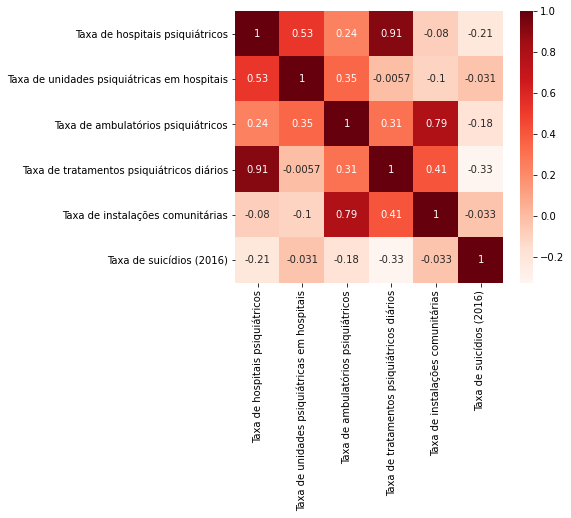

In [ ]:
#exibição de um gráfico de correlação para os países da América Latina

plt.figure (figsize = (6,5)) 
cor1 = dfSM_AL.corr () 
sns.heatmap (cor1, annot = True, cmap = plt.cm.Reds) 
plt.show ()

A partir dos dados para a América Latina, nota-se que todos as taxas apresentaram correlação negativa com a taxa de suicídios, ou seja, aparenta ser um indicativo de que onde há mais estruturas e atenção voltada ao tratamento da saúde mental, a taxa de suicídios tende a ser menor. Neste ponto é necessário destacar que muitas correlações tem pouca significância, sendo válido considerar a possibilidade de algumas serem indepentes a taxa de suicídios, ou seja, aumentar a quantidade de unidades psiquiátricas e as instalações comunitárias pode ter efeito praticamente independente com a taxa de suicídios (não correlacionado).

In [ ]:
# Exibindo a correlação das demais variáveis com a quantidade (taxa) de hospitais de saúde mental para a América Latina
corr_taxaSuic = cor1['Taxa de suicídios (2016)']
print(corr_taxaSuic)

Taxa de hospitais psiquiátricos               -0.206506
Taxa de unidades psiquiátricas em hospitais   -0.030735
Taxa de ambulatórios psiquiátricos            -0.175358
Taxa de tratamentos psiquiátricos diários     -0.325219
Taxa de instalações comunitárias              -0.032776
Taxa de suicídios (2016)                       1.000000
Name: Taxa de suicídios (2016), dtype: float64


In [ ]:
# Seleção das características altamente correlacionadas, com nível de correlação maior que 0,5
alta_corr = corr_taxaSuic[(abs(corr_taxaSuic) > 0.5)] 
print(alta_corr)


Taxa de suicídios (2016)    1.0
Name: Taxa de suicídios (2016), dtype: float64


Ou seja, pelo resultado observado, não houve nenhuma outra variável altamente positivamente correlacionada com a taxa de quantiadade de suicídios nos países da América Latina.

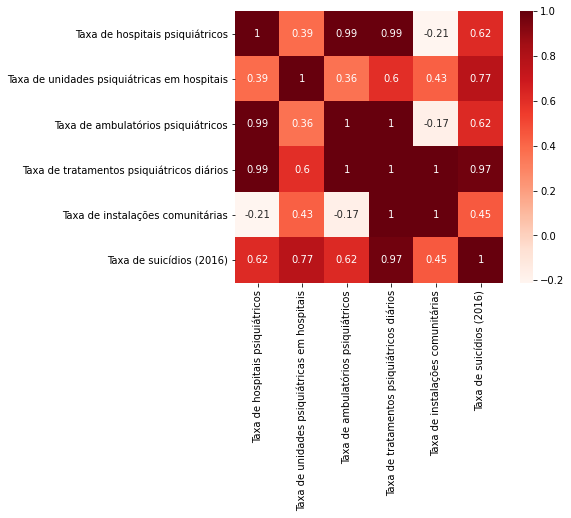

In [ ]:
#exibição de um gráfico de correlação para os países ricos selecionados

plt.figure (figsize = (6,5)) 
cor2 = dfSM_PPC.corr () 
sns.heatmap (cor2, annot = True, cmap = plt.cm.Reds) 
plt.show ()

In [ ]:
# Exibindo a correlação das demais variáveis com a quantidade (taxa) de hospitais de saúde mental para os países ricos selecionados
corr_taxaSuic2 = cor2['Taxa de suicídios (2016)']
print(corr_taxaSuic2)

Taxa de hospitais psiquiátricos                0.616966
Taxa de unidades psiquiátricas em hospitais    0.765397
Taxa de ambulatórios psiquiátricos             0.624882
Taxa de tratamentos psiquiátricos diários      0.972108
Taxa de instalações comunitárias               0.448648
Taxa de suicídios (2016)                       1.000000
Name: Taxa de suicídios (2016), dtype: float64


In [ ]:
# Seleção das características altamente correlacionadas, com nível de correlação maior que 0,5
alta_corr2 = corr_taxaSuic2[(abs(corr_taxaSuic2) > 0.5)] 
print(alta_corr2)

Taxa de hospitais psiquiátricos                0.616966
Taxa de unidades psiquiátricas em hospitais    0.765397
Taxa de ambulatórios psiquiátricos             0.624882
Taxa de tratamentos psiquiátricos diários      0.972108
Taxa de suicídios (2016)                       1.000000
Name: Taxa de suicídios (2016), dtype: float64


Pelo resultado observado, para os países ricos selecionados, as taxas de hospitais, unidades psiquiátricas, ambulatórios e tratamentos diários, tem uma alta correlação positiva com a taxa de suicídios para o ano de 2016. Ou seja, há indício de que os países ricos, por apresentarem elevadas taxas de suicídio ao longo dos anos, vem investindo em estruturas de tratamento e atendimento psicológico e psiquiátrico.

Conforme observado no gráfico das taxas de suicídio para homens e mulheres ao longo dos anos de 2000, 2010 e 2019, o número de suicídios para os países ricos vem caindo.

###Utilização da biblioteca Plotly para visualização de dados

In [ ]:
#importando o pacote offline da biblioteca
from plotly.offline import iplot
import plotly.graph_objs as go

#importando plotly express
import plotly.express as px

- Gráfico de Dispersão

In [ ]:
#gráfico de dispersão países América Latina
graf8 = go.Scatter(x = dfSM_AL['Taxa de hospitais psiquiátricos'],
                   y = dfSM_AL['Taxa de suicídios (2016)'],
                   mode='markers',
                   marker = dict(color= '#55D6BE')
                   )
#gráfico de dispersão países ricos
graf9 = go.Scatter(x = dfSM_PPC['Taxa de hospitais psiquiátricos'],
                   y = dfSM_PPC['Taxa de suicídios (2016)'],
                   mode='markers',
                   marker = dict(color= '#ED07CB')
                   )

datatotal = [graf8, graf9]

conf_layout = go.Layout(title={
                  'text': "Taxas de suicídio para países da América Latina em 2019",
                  'y':0.9,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   xaxis={'title':'Taxa de hospitais psiquiátricos por 100 mil/hab'},
                   yaxis={'title':'Taxa de suicídio por 100 mil/hab'},
                   font={
                  'family':"Arial, monospace",
                  'size':12,
                  'color':"#525252"}
  )

fig = go.Figure(data=datatotal, layout=conf_layout)

iplot(fig)

In [ ]:
fig = px.scatter(dfSM_AL, x="Taxa de hospitais psiquiátricos", y="Taxa de suicídios (2016)", color="País",
                 size='Taxa de suicídios (2016)')
fig.show()

###Utilização de gráficos Plotly e envio em nuvem para edição no Chart Studio

In [ ]:
#importando o módulo do chart studio para exportar gráficos para nuvem
import chart_studio
import chart_studio.plotly as pyo
import plotly.graph_objs as go

A princípio, não serão enviados gráficos desta base de dados para o Chart Studio.